# What is it that people want to learn in Data Science ?

Our Goal in this project is to scour the internet ( particularly <a href='https://datascience.stackexchange.com/' target='_blank'> Data Science Stack exchange</a> ) in search of popular Data Science questions or any fields of Data Science people want to learn.

<a href='https://stackexchange.com/tour' target='_blank'>Stack Exchange </a> is world largest programming community created and run by experts and enthusiasts who are passionate about specific topic .It has dedicated sites on multitude of fields and subjects like Mathematics, Stack Overflow, Physics,Data Science etc. Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes.

We explore one of its dedicated site Data Science Stack Exchange <a href='https://datascience.stackexchange.com/' target='_blank'>(DSSE) </a> and find that tagging system used by System Exchange will be very useful in categorizng content.

## Getting the data - Stack Exchange Data Explorer
Stack Exchange provide public data base for each of its websites. To get the relevant data we run the following query to Data Science dedicated <a href='https://data.stackexchange.com/datascience/query/new' target='_blank' >data explorer </a> and downloaded the rows in ` 2022_questions.csv `.
> ```
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
FROM posts
WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2022;
```


`Id` : An Identification number for the post

`CreationDate` : The date and time of creation of the post

`Score` : The Post's score

`ViewCount` : How many times the post was viewed

`Tags` : What tags were used

`AnswerCount` : How many answers the question got

`FavouriteCount` : How many times the question was favoured

PostTypeId 1 is for Question

### Exploring the data

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [465]:
# read csv file and parsing CreationDate as Datetime Object
questions = pd.read_csv('dataset/2022_questions.csv', parse_dates =['CreationDate'])
display(questions.head())
print(questions.info())

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,106600,2022-01-01 00:20:53,2,1097,<python><keras><tensorflow><regression>,1,NaN
1,106602,2022-01-01 03:32:55,3,123,<deep-learning><word-embeddings><deepmind>,1,NaN
2,106603,2022-01-01 06:18:52,0,31,<logistic-regression><sigmoid>,1,NaN
3,106607,2022-01-01 15:07:25,1,21,<machine-learning><python><pandas><statistics>...,0,NaN
4,106609,2022-01-01 15:40:23,0,27,<nlp><data-science-model><bert>,0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5627 entries, 0 to 5626
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             5627 non-null   int64         
 1   CreationDate   5627 non-null   datetime64[ns]
 2   Score          5627 non-null   int64         
 3   ViewCount      5627 non-null   int64         
 4   Tags           5627 non-null   object        
 5   AnswerCount    5627 non-null   int64         
 6   FavoriteCount  20 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 307.9+ KB
None


Observations :
 - Tranform values in `Tags` to look more like list [ machine-learning , regression]
 - `FavoriteCount` has missing values. 

## Data Cleaning

In [466]:
# Fill null values with 0
questions.fillna(value = {'FavoriteCount':0},inplace = True)
# change to int dtype
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
#checking
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [467]:
#clean the tag columns
questions['Tags']= questions['Tags'].str.replace('^<|>$',"").str.split('><')
questions.sample(3)

<ipython-input-467-b7f21418cb8e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  questions['Tags']= questions['Tags'].str.replace('^<|>$',"").str.split('><')


,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
2944,112289,2022-07-01 03:01:19,0,27,"[deep-learning, cnn, convolutional-neural-netw...",0,0
221,107149,2022-01-17 06:05:22,0,20,"[deep-learning, time-series]",0,0
1985,110511,2022-04-30 07:53:34,0,41,"[nlp, sentiment-analysis, topic-model, lda, ge...",0,0


We now focus on finding popular tags. We do this by considering two different popularity proxies - how many times each tag was used and how many times a questio with that tag was viewed.

Now we limit our research to counts and views `ViewCount`.

## Most used and Most Viewed

We begin by counting how many times each tags were used

In [468]:
# two empty dict for count and views
tag_count = dict()
tag_view_count = dict()

#iterate through each row of questions Dataframe
for index, row in questions.iterrows():
    #iterate through Tag Column of each row
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_count[tag] += 1
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_count[tag] = 1 
            tag_view_count[tag] = row['ViewCount']
print(tag_count)
print('\n')
print(tag_view_count)

{'python': 934, 'keras': 317, 'tensorflow': 339, 'regression': 272, 'deep-learning': 812, 'word-embeddings': 78, 'deepmind': 5, 'logistic-regression': 109, 'sigmoid': 5, 'machine-learning': 1533, 'pandas': 174, 'statistics': 174, 'class-imbalance': 73, 'nlp': 467, 'data-science-model': 183, 'bert': 112, 'pipelines': 26, 'imbalanced-learn': 11, 'methodology': 13, 'oversampling': 7, 'decision-trees': 83, 'machine-learning-model': 204, 'azure-ml': 12, 'normalization': 50, 'k-nn': 24, 'neural-network': 455, 'backpropagation': 34, 'classification': 450, 'cross-validation': 71, 'scikit-learn': 306, 'svm': 70, 'preprocessing': 88, 'tokenization': 19, 'data-cleaning': 108, 'bias': 28, 'transfer-learning': 37, 'gradient-descent': 67, 'inception': 3, 'pooling': 7, 'anomaly-detection': 65, 'outlier': 31, 'anomaly': 3, 'numpy': 52, 'word2vec': 38, 'predictive-modeling': 151, 'sports': 2, 'computer-vision': 137, 'one-hot-encoding': 39, 'ensemble-learning': 10, 'object-detection': 77, '3d-object-det

`most_used` : Dataframe that counts how many times each of the top 20 tags used

`most_viewed` : Dataframe that counts how many times each of the top 20 tags viewed

In [469]:
# transform dict to Dataframe
tag_count = pd.DataFrame.from_dict(tag_count,orient = 'index')
tag_view_count = pd.DataFrame.from_dict(tag_view_count,orient ='index')
#Rename the columns
tag_count.columns =['Count']
tag_view_count.columns = ['ViewCount']
# sort these Dataframes in ascending order and take top 20 results
most_used = tag_count.sort_values('Count').tail(20)
most_viewed = tag_view_count.sort_values('ViewCount').tail(20)
display(most_used)
display(most_viewed)

,Count
pandas,174
statistics,174
pytorch,182
data-science-model,183
cnn,189
clustering,194
dataset,196
machine-learning-model,204
lstm,221
regression,272


,ViewCount
cnn,14781
regression,15002
random-forest,16213
clustering,16444
transformer,17706
dataframe,18627
lstm,19450
pytorch,20705
time-series,30555
machine-learning-model,33439


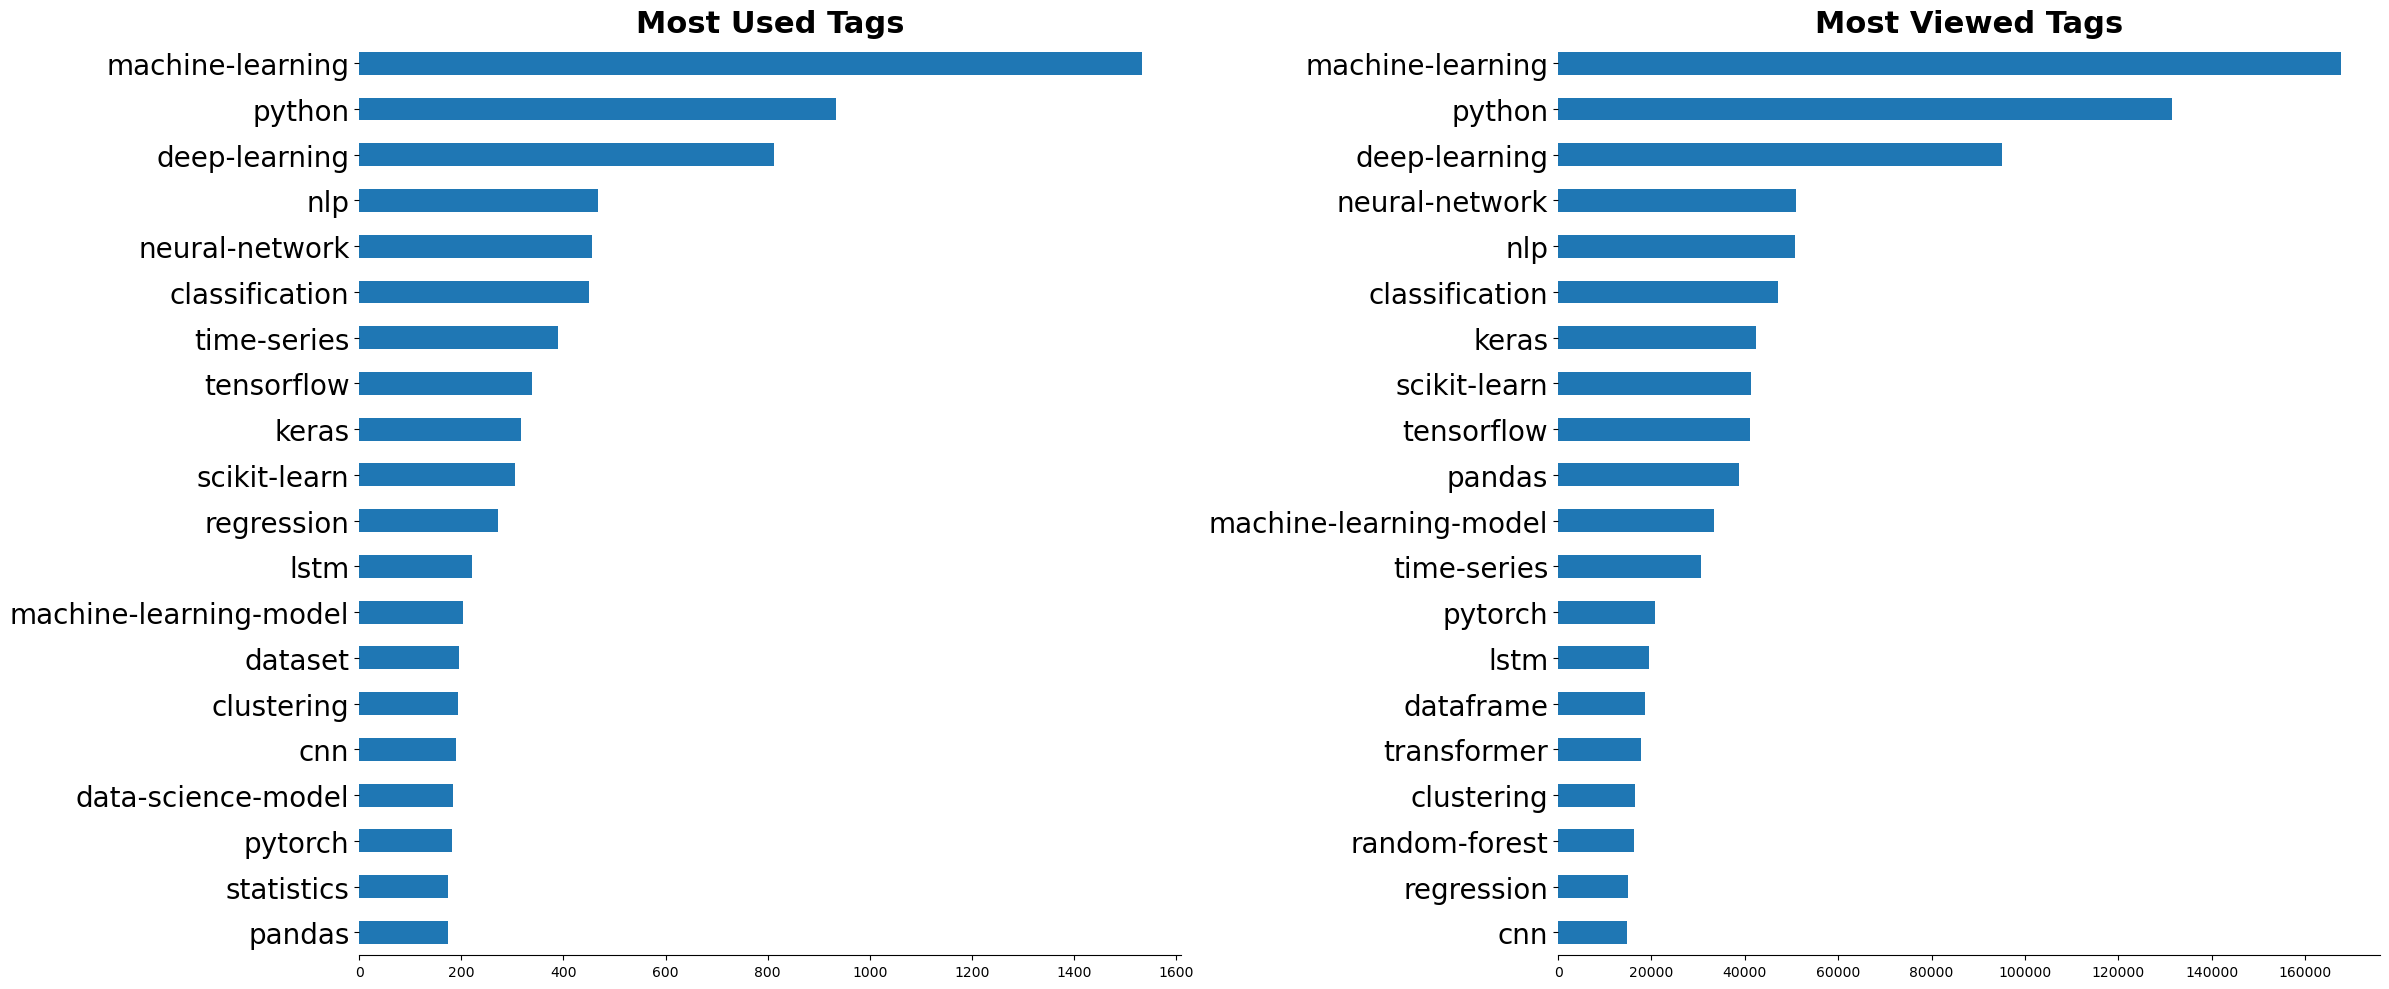

In [470]:
plt.style.use('default')
# check top 20 tags for both most_viewed and most_used  side by side
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(24,10))
most_used.plot(kind='barh',ax=ax1,legend= False)
most_viewed.plot(kind='barh',ax=ax2, legend = False)

#titles and adjust fontsize
ax1.set_title('Most Used Tags',fontsize= 22,weight='bold')
ax2.set_title('Most Viewed Tags',fontsize = 22, weight='bold')
ax1.tick_params(axis='y',labelsize=20)
ax2.tick_params(axis='y',labelsize=20)

for ax_ in [ax1,ax2]:
    for pos in ['right','top','left']:
        ax_.spines[pos].set_visible(False)

#for equal spacing between axes
plt.tight_layout()

We see that most top tops are present in both dataframes.

Lets see which tags is in `most_viewed` but not in `most_used` 

In [471]:
set(most_viewed.index).difference(most_used.index)

{'dataframe', 'random-forest', 'transformer'}

tags in `most_used` but not in `most_viewed`

In [472]:
set(most_used.index).difference(most_viewed.index)

{'data-science-model', 'dataset', 'statistics'}

## Relations between Tags

In [473]:
all_tags = tag_count.index.tolist()

In [474]:
corr_tags = pd.DataFrame(index = all_tags, columns = all_tags)
corr_tags.fillna(0,inplace= True)
corr_tags

,python,keras,tensorflow,regression,deep-learning,word-embeddings,deepmind,logistic-regression,sigmoid,machine-learning,...,umap,crawling,document-term-matrix,classificationmulti,data-source,share-point,dirichlet,kedro,entropy,image-size
python,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
keras,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tensorflow,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
regression,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deep-learning,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
share-point,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dirichlet,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
kedro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
entropy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [475]:
for tags in questions['Tags']:
    corr_tags.loc[tags,tags] += 1


In [476]:
#reduce the size to ones related with most used tags
relations_most_used = corr_tags.copy().loc[most_used.index,most_used.index]
relations_most_used

,pandas,statistics,pytorch,data-science-model,cnn,clustering,dataset,machine-learning-model,lstm,regression,scikit-learn,keras,tensorflow,time-series,classification,neural-network,nlp,deep-learning,python,machine-learning
pandas,174,3,1,4,0,2,10,0,2,7,20,3,1,8,4,0,2,3,92,20
statistics,3,174,0,10,1,8,6,7,1,18,3,0,0,11,14,4,2,11,14,52
pytorch,1,0,182,3,14,4,2,3,14,4,3,7,14,10,3,19,21,48,38,32
data-science-model,4,10,3,183,3,5,11,21,5,10,14,6,6,10,11,5,7,19,39,83
cnn,0,1,14,3,189,1,3,1,10,12,0,30,33,8,11,19,4,62,25,36
clustering,2,8,4,5,1,194,4,5,0,5,9,0,0,14,13,0,17,7,34,51
dataset,10,6,2,11,3,4,196,7,3,7,5,6,6,6,12,8,15,15,31,52
machine-learning-model,0,7,3,21,1,5,7,204,1,8,15,9,8,7,27,19,4,32,25,90
lstm,2,1,14,5,10,0,3,1,221,10,3,46,33,75,9,39,19,50,33,48
regression,7,18,4,10,12,5,7,8,10,272,21,10,4,21,24,24,0,25,25,75


In [477]:
#diagonally placed values are high where same tag is on x and y.
#replace those values so colors will not be too skewed
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.nan

Text(0.5, 1.05, '             Relations between Most Used Tags             ')

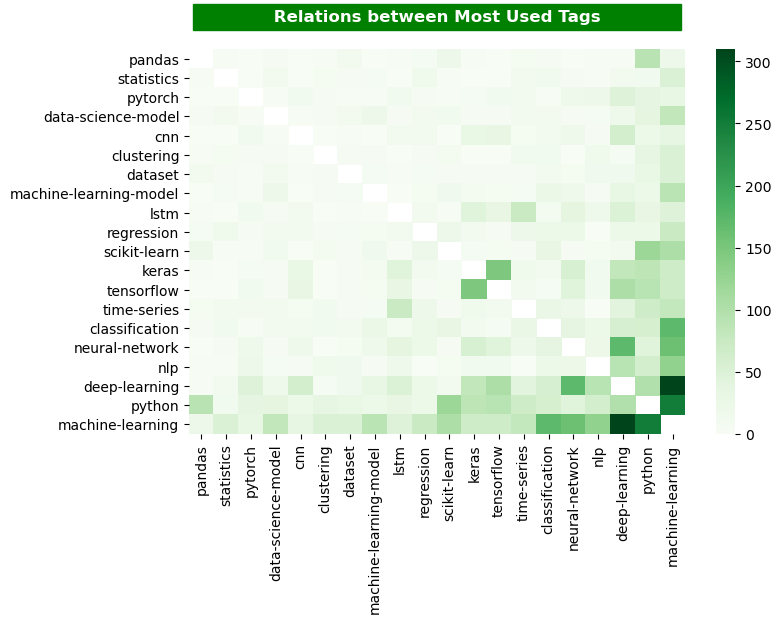

In [478]:
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(relations_most_used,cmap='Greens', ax=ax)
ax.set_title('             Relations between Most Used Tags             ',y=1.05,size= 12,backgroundcolor='green', color='white',weight='bold')
  

Observations
- Looking at bottom right corner,Most used tags seems to have strong relations
- Most of python libraries schikit-learn , keras, tensorflow are for Machine Learning 
- Most of tags are directing to one new area of machine learning : **Deep Learning**


## Is Deep Learning just a fad?

We further track the interest in deep learning across time.

We run the following query to Stack Exchange Data Explorer and save results to `all_questions.csv`

>```
SELECT Id, 
       CreationDate,
       Tags
  FROM Posts
 WHERE PostTypeId = 1;
```

In [479]:
#read csv file
all_questions= pd.read_csv('dataset/all_questions.csv', parse_dates=['CreationDate'])
#check for non null values and dtypes
all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35417 entries, 0 to 35416
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            35417 non-null  int64         
 1   CreationDate  35417 non-null  datetime64[ns]
 2   Tags          35417 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 830.2+ KB


In [480]:
#Transform Tags column in similar manner as above.
all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>$','').str.split('><')

<ipython-input-480-2cd186882cd6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_questions['Tags'] = all_questions['Tags'].str.replace('^<|>$','').str.split('><')


We list the tags that are related to deep learning questions. These tags are obtained at the tags in `most_used` and search for Tag Synonyms

In [481]:
deep_learning_list = ['python','classification','rnn','cnn','keras','tensorflow','scikit-learn','lstm','neural-network','deep-learning',
                      'image-recongnition','nlp','machine-learning','sklearn','scikit','deep-betwork','nn','natural-language-process','ml']

#function assigns 1 if tag related to deep learning is present
def class_deep_learning(tags):
    for tag in tags:
        if tag in deep_learning_list:
            return 1
    return 0
all_questions['DeepLearning'] = all_questions['Tags'].apply(class_deep_learning)
all_questions.sample(5)

,Id,CreationDate,Tags,DeepLearning
5520,6992,2015-09-03 09:57:16,[random-forest],0
2279,87327,2020-12-30 07:54:20,"[data-mining, data-cleaning, data-science-mode...",0
23316,78551,2020-07-30 16:03:22,"[python, statistics, data-science-model, data-...",1
25026,80791,2020-08-25 19:49:49,"[python, tensorflow, linear-regression, optimi...",1
28930,112001,2022-06-21 09:38:56,"[machine-learning, deep-learning, transformer,...",1


In [482]:
#filter out any rows where Year is 2023
all_q_2022 = all_questions.copy()[all_questions['CreationDate'].dt.year < 2023]

In [483]:
# There are 35315 question related with Dee Learning between 2014-2022
all_q_2022.shape

(35313, 4)

In [484]:
# There are 24689 question related to Deep Learning
all_q_2022['DeepLearning'].sum()

24689

We decide to group data by quarter and

- Count how many deep learning questions are asked 
- Count total amount of questions 
- How many deep learning questions there are relative to the total amount of questions

We now define a column that identifies Quarter.

In [485]:
def quarter(datetime):
    year = str(datetime.year)[-2:]
    month = str(((datetime.month - 1)//3) + 1)
    return '{}Q{}'.format(year,month)
all_q_2022['Quarter'] = all_q_2022['CreationDate'].apply(quarter)
all_q_2022.sample(3)

,Id,CreationDate,Tags,DeepLearning,Quarter
1078,61130,2019-10-02 06:57:12,"[machine-learning, neural-network, keras, line...",1,19Q4
32519,55205,2019-07-07 09:15:04,"[machine-learning, logistic-regression, accura...",1,19Q3
25532,49023,2019-04-10 07:27:26,"[machine-learning, python, deep-learning, scik...",1,19Q2


In [486]:
quarterly = all_q_2022.groupby('Quarter').agg({'DeepLearning':['sum','size']})
quarterly.columns=['DeepLearningQuestions','TotalQuestions']
quarterly.reset_index(inplace = True)
quarterly['DeepLearningRate'] = quarterly['DeepLearningQuestions']/quarterly['TotalQuestions']
quarterly.sample(3)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
8,16Q2,284,510,0.556863
21,19Q3,1297,1741,0.744974
10,16Q4,353,518,0.681467


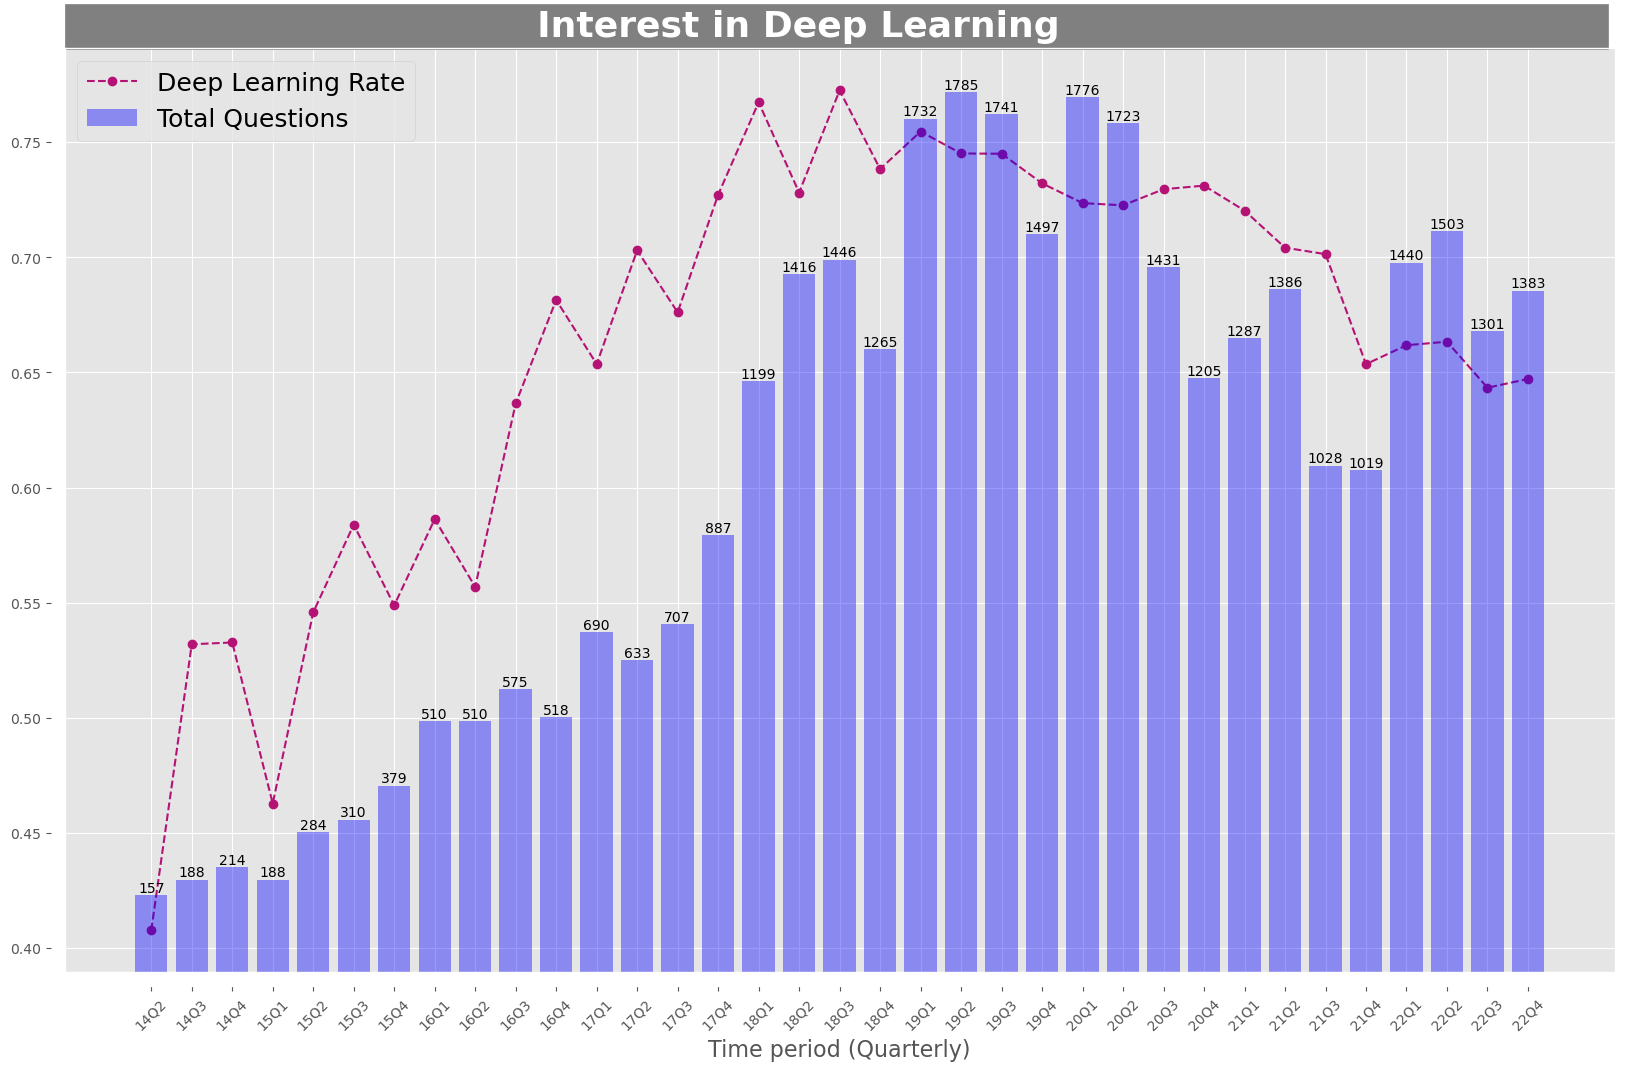

In [488]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,12),sharey= False)

ax.plot(quarterly['Quarter'], quarterly['DeepLearningRate'],color='#b51275',linestyle='--',marker='o',label='Deep Learning Rate')
ax2 = ax.twinx()
ax2.bar(quarterly['Quarter'], quarterly['TotalQuestions'],color='blue',alpha=0.4 ,label='Total Questions')

ax.text(-2,0.796,"                                     Interest in Deep Learning                                           ",
        size= 26,backgroundcolor='grey',weight='bold',color='white')
# set xlabels , remove ticks & labels 
ax.set_xlabel('Time period (Quarterly)',size=16)
ax2.yaxis.set_visible(False)

#remove left,right,top spine
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))


#rotate x tick labels
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    
for index,t in quarterly['TotalQuestions'].iteritems():
    ax2.text(index,t,str(t),ha='center', va='bottom')
    
#handling legends
handle1, label1 = ax.get_legend_handles_labels()
handle2, label2 = ax2.get_legend_handles_labels()
ax.legend(handles = handle1+handle2,labels = label1+ label2, loc="upper left",fontsize=18)

plt.savefig("interest.png")

#### Conclusion

It seems that Deep Learning question was high growth trend till 2018, then the growth plateau. Since 2021 there seems no. of questions posted on DSSE declined and so it is reflected on Deep Learning Rate too. We see that still > 60% of questions is related to Deep Learning.So we can conclude that deep learning is a field People want to learn.

It would be interesting to further explore on why people engagement declining and Does PostTypeId (2) for Answering display the same trend.